In [67]:
"""
maximum availible volume to pool into
"""
max_volume=500

"""
maximum availible volume to be taken out of well
"""
max_oligo_volume=80

"""
maximum availible volume to be taken out of well
"""
min_oligo_volume=4

# """
# target moles of oligo pmol
# """
# target_quantity=90

In [68]:
EXPERIMENT_NAME = "OVFF368"
# reading file
import pandas as pd
df_calculated =  pd.read_csv(f'./content/{EXPERIMENT_NAME}/{EXPERIMENT_NAME}_calculated.csv', delimiter='\t', decimal=".")

df = pd.read_csv(f'./content/{EXPERIMENT_NAME}/{EXPERIMENT_NAME}_concentrations.csv', delimiter=';', decimal=".")

"""
strip the text everywhere on data frame
"""
cols = df.select_dtypes(object).columns
df[cols] = df[cols].apply(lambda x: x.str.strip())
"""
and again
"""
cols = df_calculated.select_dtypes(object).columns
df_calculated[cols] = df_calculated[cols].apply(lambda x: x.str.strip())

"""
now merge cleaned dataframes
"""
merge = pd.merge(df, df_calculated, on='where', how='inner', suffixes=('', '_drop'))
#Drop the duplicate columns
merge.drop([col for col in merge.columns if 'drop' in col], axis=1, inplace=True)

df = merge

df.to_csv(f'./content/{EXPERIMENT_NAME}/{EXPERIMENT_NAME}_merged_input.csv', encoding='UTF8')

In [69]:
df

,where,code,seq,-,--,length,Nucleic Acid(ng/uL),Unnamed: 7,monoisotopic_mass
0,J17,18S_F,GGA CAC GGA CAG GAT TGA CAG ATT GAT AG,(DMT ON),KALISH,#= 29,1816.195,NaN,9039.86
1,K17,18S_R,GGA CAT CTA AGG GCA TCA CAG ACC,(DMT ON),KALISH,#= 24,1269.812,NaN,7355.78
2,L17,HPRT1_F,CAC TAT GAG CCT ATA GAC TAT CAG TTC CCT TTG G,(DMT ON),KALISH,#= 34,1826.443,NaN,10367.69
3,M17,HPRT1_R,CCA GGA CAG AAC AAA ACT TCT TAG ATG CTG,(DMT ON),KALISH,#= 30,1261.725,NaN,9207.98
4,N17,GUSB_F,GAT CTT CAC TCG GCA GAG ACA ACC,(DMT ON),KALISH,#= 24,1365.211,NaN,7306.75
...,...,...,...,...,...,...,...,...,...
66,L21,Sema_SUMO_F0-14,ACC AGC CAC GCG ATA AAC TCT TTC GCC GCC TGG CC...,(DMT ON),Nikiteev,#= 46,2025.560,NaN,13944.96
67,M21,Sema_SUMO_F0-15,AGT TTA TCG CGT GGC TGG TCC GTG GCC GCG GTT GA...,(DMT ON),Nikiteev,#= 52,2548.469,NaN,16083.28
68,N21,Sema_SUMO_F0-16,CTT TGT TAG CAG CCG GAT CAA CCG,(DMT ON),Nikiteev,#= 24,1109.949,NaN,7328.75
69,M24,TDT_F0-F_(B/S),TAT AGG ATC CAG CCC GAG CCC GGT T,(DMT OFF),CUSTOMER,#= 25,1209.780,NaN,7642.94


In [70]:
for i in df.columns:
    try:
        df[i] = df[i].str.replace(',', '.').astype(float)
    except:
        pass
    
df['monoisotopic_mass'] = df['monoisotopic_mass'].astype(float)
df["pM/mkl"] = 1000*df['Nucleic Acid(ng/uL)']/df['monoisotopic_mass']
# df=df.dropna()

df

,where,code,seq,-,--,length,Nucleic Acid(ng/uL),Unnamed: 7,monoisotopic_mass,pM/mkl
0,J17,18S_F,GGA CAC GGA CAG GAT TGA CAG ATT GAT AG,(DMT ON),KALISH,#= 29,1816.195,NaN,9039.86,200.909638
1,K17,18S_R,GGA CAT CTA AGG GCA TCA CAG ACC,(DMT ON),KALISH,#= 24,1269.812,NaN,7355.78,172.627784
2,L17,HPRT1_F,CAC TAT GAG CCT ATA GAC TAT CAG TTC CCT TTG G,(DMT ON),KALISH,#= 34,1826.443,NaN,10367.69,176.166822
3,M17,HPRT1_R,CCA GGA CAG AAC AAA ACT TCT TAG ATG CTG,(DMT ON),KALISH,#= 30,1261.725,NaN,9207.98,137.025167
4,N17,GUSB_F,GAT CTT CAC TCG GCA GAG ACA ACC,(DMT ON),KALISH,#= 24,1365.211,NaN,7306.75,186.842440
...,...,...,...,...,...,...,...,...,...,...
66,L21,Sema_SUMO_F0-14,ACC AGC CAC GCG ATA AAC TCT TTC GCC GCC TGG CC...,(DMT ON),Nikiteev,#= 46,2025.560,NaN,13944.96,145.253913
67,M21,Sema_SUMO_F0-15,AGT TTA TCG CGT GGC TGG TCC GTG GCC GCG GTT GA...,(DMT ON),Nikiteev,#= 52,2548.469,NaN,16083.28,158.454557
68,N21,Sema_SUMO_F0-16,CTT TGT TAG CAG CCG GAT CAA CCG,(DMT ON),Nikiteev,#= 24,1109.949,NaN,7328.75,151.451339
69,M24,TDT_F0-F_(B/S),TAT AGG ATC CAG CCC GAG CCC GGT T,(DMT OFF),CUSTOMER,#= 25,1209.780,NaN,7642.94,158.287256


In [72]:
pool_1 = "Sema_SUMO_F0-"

POOL_NAME=pool_1

df = df[df["code"].str.contains(f'^{POOL_NAME}\d+')]
df

,where,code,seq,-,--,length,Nucleic Acid(ng/uL),Unnamed: 7,monoisotopic_mass,pM/mkl
33,K19,Sema_SUMO_F0-0,TGC CCA TGG TAT ATC TCC TTC TTA,(DMT OFF),Nikiteev,#= 24,1220.494,NaN,7244.69,168.467388
34,L19,Sema_SUMO_F0-1,TAA GAA GGA GAT ATA CCA TGG GCA GCA GCC ATC AT...,(DMT OFF),Nikiteev,#= 46,2343.218,NaN,14144.15,165.666937
35,M19,Sema_SUMO_F0-2,GAC ATG CTA GCG CTG CCG CGC GGC ACC AGG CCG CT...,(DMT OFF),Nikiteev,#= 61,1961.881,NaN,18864.04,104.001105
36,N19,Sema_SUMO_F0-3,GCG GCA GCG CTA GCA TGT CGG ACT CAG AAG TCA AT...,(DMT OFF),Nikiteev,#= 55,1896.732,NaN,17051.97,111.232427
37,O19,Sema_SUMO_F0-4,CTC AGG CTT GAC TTC TGG CTT GAC CTC TGG CTT AG...,(DMT OFF),Nikiteev,#= 44,2526.386,NaN,13437.60,188.008722
38,P19,Sema_SUMO_F0-5,AGC CAG AAG TCA AGC CTG AGA CTC ACA TCA ATT TA...,(DMT OFF),Nikiteev,#= 55,2244.239,NaN,16926.90,132.584171
39,A20,Sema_SUMO_F0-6,GAG TGG TCT TTT TGA TCT TGA AGA AGA TCT CTG AA...,(DMT OFF),Nikiteev,#= 56,2473.172,NaN,17267.12,143.230139
40,B20,Sema_SUMO_F0-7,CTT CTT CAA GAT CAA AAA GAC CAC TCC TTT AAG AA...,(DMT OFF),Nikiteev,#= 50,1985.680,NaN,15385.93,129.058172
41,C20,Sema_SUMO_F0-8,AGT CCA TTT CCT TAC CCT GTC TTT TAG CGA ACG CT...,(DMT OFF),Nikiteev,#= 50,1866.755,NaN,15114.69,123.506006
42,D20,Sema_SUMO_F0-9,AAG ACA GGG TAA GGA AAT GGA CTC CTT AAG ATT CT...,(DMT OFF),Nikiteev,#= 57,2137.305,NaN,17687.41,120.837647


In [75]:
df = df.loc[52:68]

df

,where,code,seq,-,--,length,Nucleic Acid(ng/uL),Unnamed: 7,monoisotopic_mass,pM/mkl
52,N20,Sema_SUMO_F0-0,TGC CCA TGG TAT ATC TCC TTC TTA,(DMT ON),Nikiteev,#= 24,1041.257,NaN,7244.69,143.726923
53,O20,Sema_SUMO_F0-1,TAA GAA GGA GAT ATA CCA TGG GCA GCA GCC ATC AT...,(DMT ON),Nikiteev,#= 46,2144.991,NaN,14144.15,151.652167
54,P20,Sema_SUMO_F0-2,GAC ATG CTA GCG CTG CCG CGC GGC ACC AGG CCG CT...,(DMT ON),Nikiteev,#= 61,1981.885,NaN,18864.04,105.061535
55,A21,Sema_SUMO_F0-3,GCG GCA GCG CTA GCA TGT CGG ACT CAG AAG TCA AT...,(DMT ON),Nikiteev,#= 55,2290.719,NaN,17051.97,134.337499
56,B21,Sema_SUMO_F0-4,CTC AGG CTT GAC TTC TGG CTT GAC CTC TGG CTT AG...,(DMT ON),Nikiteev,#= 44,1938.558,NaN,13437.60,144.263708
57,C21,Sema_SUMO_F0-5,AGC CAG AAG TCA AGC CTG AGA CTC ACA TCA ATT TA...,(DMT ON),Nikiteev,#= 55,2646.249,NaN,16926.90,156.333942
58,D21,Sema_SUMO_F0-6,GAG TGG TCT TTT TGA TCT TGA AGA AGA TCT CTG AA...,(DMT ON),Nikiteev,#= 56,2332.931,NaN,17267.12,135.108287
59,E21,Sema_SUMO_F0-7,CTT CTT CAA GAT CAA AAA GAC CAC TCC TTT AAG AA...,(DMT ON),Nikiteev,#= 50,1119.133,NaN,15385.93,72.737430
60,F21,Sema_SUMO_F0-8,AGT CCA TTT CCT TAC CCT GTC TTT TAG CGA ACG CT...,(DMT ON),Nikiteev,#= 50,2116.179,NaN,15114.69,140.008098
61,G21,Sema_SUMO_F0-9,AAG ACA GGG TAA GGA AAT GGA CTC CTT AAG ATT CT...,(DMT ON),Nikiteev,#= 57,1943.091,NaN,17687.41,109.857294


Text(0, 0.5, 'occurencies')

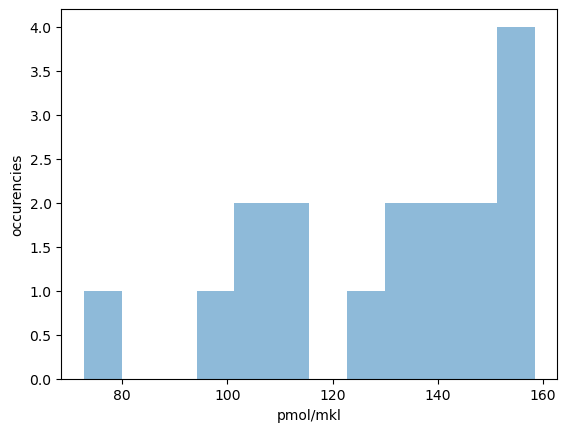

In [76]:
"""
смотрим распределение по корзинам
"""
ax = df['pM/mkl'].plot.hist(bins=12, alpha=0.5)
initial_oligos_concentrations = df['pM/mkl']
ax.set_xlabel("pmol/mkl")
ax.set_ylabel("occurencies")

In [77]:
'''
определяем выбросы
'''
import pandas
import numpy as np
from scipy import stats

# %reload_ext google.colab.data_table

df['score'] = np.abs(stats.zscore(df['pM/mkl']))<1.8
# df[(np.abs(stats.zscore(df)) < 1.5).all(axis=1)]
filtered, filtered_off = (df[(np.abs(stats.zscore(df['pM/mkl'])) < 1.8)], df[(np.abs(stats.zscore(df['pM/mkl'])) >= 1.8)])
filtered_off

/opt/conda/lib/python3.7/site-packages/ipykernel_launcher.py:10: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  # Remove the CWD from sys.path while we load stuff.


,where,code,seq,-,--,length,Nucleic Acid(ng/uL),Unnamed: 7,monoisotopic_mass,pM/mkl,score
59,E21,Sema_SUMO_F0-7,CTT CTT CAA GAT CAA AAA GAC CAC TCC TTT AAG AA...,(DMT ON),Nikiteev,#= 50,1119.133,NaN,15385.93,72.73743,False


Text(0, 0.5, 'occurencies')

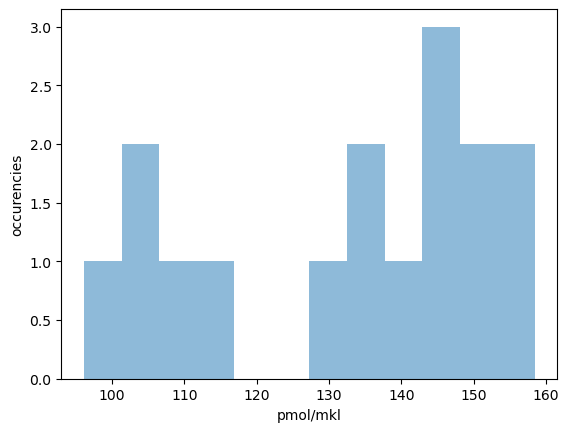

In [78]:
"""
смотрим распределение по корзинам
"""
ax = filtered['pM/mkl'].plot.hist(bins=12, alpha=0.5)
ax.set_xlabel("pmol/mkl")
ax.set_ylabel("occurencies")

In [79]:
"""
split into N bins by quantiles
"""
N = 8

labels=list(np.arange(1, N))
labels = [str(elem) for elem in labels]
q = list(np.linspace(0, 1, N))

filtered["quantile"] = pd.qcut(df['pM/mkl'], q=q, labels=labels)

'''
выравниваем группы концентраций в пределах отличия в 1.5 раз
'''
highest_quantile_median_conc = filtered[filtered['quantile'] == labels[-1]]['pM/mkl'].median()
for i in labels:
    
    i_quantile_median_conc = filtered[filtered['quantile'] == i]['pM/mkl'].median()
    mkl = round(5*highest_quantile_median_conc/i_quantile_median_conc)
    filtered.loc[filtered['quantile'] == i, ['mkl']] = mkl


"""
пересчитываем моли
"""
filtered['pmol'] = filtered['mkl']*filtered['pM/mkl']
median_conc = round(filtered['pM/mkl'].median())
median_moles_in_pool = round(filtered['pmol'].median())
# print(filtered.sort_values('pM/mkl'))
print(f"equalized result: median_moles_in_pool = {median_moles_in_pool}")
filtered

equalized result: median_moles_in_pool = 775


/opt/conda/lib/python3.7/site-packages/ipykernel_launcher.py:10: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  # Remove the CWD from sys.path while we load stuff.
/opt/conda/lib/python3.7/site-packages/pandas/core/indexing.py:1817: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  self._setitem_single_column(loc, value, pi)
/opt/conda/lib/python3.7/site-packages/ipykernel_launcher.py:26: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_in

,where,code,seq,-,--,length,Nucleic Acid(ng/uL),Unnamed: 7,monoisotopic_mass,pM/mkl,score,quantile,mkl,pmol
52,N20,Sema_SUMO_F0-0,TGC CCA TGG TAT ATC TCC TTC TTA,(DMT ON),Nikiteev,#= 24,1041.257,NaN,7244.69,143.726923,True,5,5.0,718.634614
53,O20,Sema_SUMO_F0-1,TAA GAA GGA GAT ATA CCA TGG GCA GCA GCC ATC AT...,(DMT ON),Nikiteev,#= 46,2144.991,NaN,14144.15,151.652167,True,7,5.0,758.260836
54,P20,Sema_SUMO_F0-2,GAC ATG CTA GCG CTG CCG CGC GGC ACC AGG CCG CT...,(DMT ON),Nikiteev,#= 61,1981.885,NaN,18864.04,105.061535,True,1,8.0,840.492281
55,A21,Sema_SUMO_F0-3,GCG GCA GCG CTA GCA TGT CGG ACT CAG AAG TCA AT...,(DMT ON),Nikiteev,#= 55,2290.719,NaN,17051.97,134.337499,True,4,6.0,806.024993
56,B21,Sema_SUMO_F0-4,CTC AGG CTT GAC TTC TGG CTT GAC CTC TGG CTT AG...,(DMT ON),Nikiteev,#= 44,1938.558,NaN,13437.60,144.263708,True,5,5.0,721.318539
57,C21,Sema_SUMO_F0-5,AGC CAG AAG TCA AGC CTG AGA CTC ACA TCA ATT TA...,(DMT ON),Nikiteev,#= 55,2646.249,NaN,16926.90,156.333942,True,7,5.0,781.669709
58,D21,Sema_SUMO_F0-6,GAG TGG TCT TTT TGA TCT TGA AGA AGA TCT CTG AA...,(DMT ON),Nikiteev,#= 56,2332.931,NaN,17267.12,135.108287,True,4,6.0,810.649720
60,F21,Sema_SUMO_F0-8,AGT CCA TTT CCT TAC CCT GTC TTT TAG CGA ACG CT...,(DMT ON),Nikiteev,#= 50,2116.179,NaN,15114.69,140.008098,True,4,6.0,840.048588
61,G21,Sema_SUMO_F0-9,AAG ACA GGG TAA GGA AAT GGA CTC CTT AAG ATT CT...,(DMT ON),Nikiteev,#= 57,1943.091,NaN,17687.41,109.857294,True,2,7.0,769.001058
62,H21,Sema_SUMO_F0-10,TTA TCC TCC ATG TCC AAA TCT TCA GGG GTC TGA TC...,(DMT ON),Nikiteev,#= 65,1913.637,NaN,19907.80,96.124986,True,1,8.0,768.999889


In [80]:
filtered_off['mkl'] = median_moles_in_pool/filtered_off['pM/mkl']
filtered_off.loc[filtered_off['mkl'] >= max_oligo_volume, ['mkl']] = max_oligo_volume
filtered_off.loc[filtered_off['mkl'] <= min_oligo_volume, ['mkl']] = min_oligo_volume
filtered_off['mkl'] = round(filtered_off['mkl'])
filtered_off

/opt/conda/lib/python3.7/site-packages/ipykernel_launcher.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  """Entry point for launching an IPython kernel.
/opt/conda/lib/python3.7/site-packages/pandas/core/indexing.py:1817: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  self._setitem_single_column(loc, value, pi)
/opt/conda/lib/python3.7/site-packages/ipykernel_launcher.py:4: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer]

,where,code,seq,-,--,length,Nucleic Acid(ng/uL),Unnamed: 7,monoisotopic_mass,pM/mkl,score,mkl
59,E21,Sema_SUMO_F0-7,CTT CTT CAA GAT CAA AAA GAC CAC TCC TTT AAG AA...,(DMT ON),Nikiteev,#= 50,1119.133,NaN,15385.93,72.73743,False,11.0


In [81]:
"""
FINAL CONCATENATION AND VOLUME ASSERTION TEST
"""
result = pd.concat([filtered_off, filtered])
result['pmol'] = result['mkl']*result['pM/mkl']
total = result['mkl'].sum()
result['final conc, pmol/mkl'] = round(result['pmol']/total, 2)
print(f"calculated total volume of pool: {total} mkl")
# assert total < total_volume, "max volume exceeded"

'''
если пул больше max_volume (500 мкл) - разбиваем на столько пробирок, сколько потребуется
'''
pool_index_list = []
sum = 0
for i in result['mkl']:
  sum+=i
  pool_index_list+=[round(1+sum//max_volume)]

result['target_well'] = pool_index_list

'''
проверяем, что у нас нет разницы концентраций на порядок
'''
assert min(result['final conc, pmol/mkl'])*10 > max(result['final conc, pmol/mkl']), "разброс концентраций превышает 1 порядок!!!\nЭто непорядок!!!"
"""
если все хорошо - идем дальше
"""
result.sort_index(inplace=True)
result
print(f"разбито на {max(pool_index_list)} пробирки(ок)")

calculated total volume of pool: 108.0 mkl
разбито на 1 пробирки(ок)


In [82]:
"""
FINALWORKLIST EXPORT
"""
volume_list = round(result['mkl'], 0).astype(int)
number_of_wells = len(volume_list)

def coordinate_to_number_parser(list_of_coords):
    '''
    переводит координату на плашке из формата A1 в порядковый номер
    '''
    index_list = []
    for i in list_of_coords: 
        
        row = ord(i[0]) - 64
        column = int(i[1:])
        index_list += [16*(column-1)+row]
    
    return index_list

list_of_indexes = coordinate_to_number_parser(result["where"].to_list())

col1 = ["384well"]*number_of_wells
col2 = list_of_indexes
col3 = ["96well"]*number_of_wells
col4 = pool_index_list
col5 = volume_list.to_list()

list_of_lists = [col1, col2, col3, col4, col5]

worklist_df = pd.DataFrame(list_of_lists)
worklist_df = worklist_df.reset_index(drop=True)
worklist_df = worklist_df.T

"""
экспортируем новый worklist
"""
worklist_df.to_csv(f'./content/{EXPERIMENT_NAME}/{EXPERIMENT_NAME}_equalized_conc_worklist_{POOL_NAME}.csv', encoding='UTF8', header=None, index=False)


"""
SOME METADATA
"""
final_equalized_oligo_concentration=median_moles_in_pool/worklist_df[4].sum()
total_volume=worklist_df[4].sum()


print(f"final_equalized_oligo_concentration = ~{final_equalized_oligo_concentration:.3f} pmol/mkl")
print(f"total_volume = {total_volume:.1f} mkl")
print(f"minimal taken volume = {min(worklist_df[4]):.2f} mkl")
print(f"max taken volume = {max(worklist_df[4]):.2f} mkl")
print(f"max разброс финальных концентраций = {100*(max(result['final conc, pmol/mkl'])-min(result['final conc, pmol/mkl']))/(result['final conc, pmol/mkl'].mean()):.2f}% или в {2*(max(result['final conc, pmol/mkl'])-min(result['final conc, pmol/mkl']))/(result['final conc, pmol/mkl'].mean()):.2f} раз")
print(f"среднее значение концентраций {result['final conc, pmol/mkl'].mean():.3f}±{result['final conc, pmol/mkl'].std():.3f} pmol/mkl")

final_equalized_oligo_concentration = ~7.176 pmol/mkl
total_volume = 108.0 mkl
minimal taken volume = 5.00 mkl
max taken volume = 11.00 mkl
max разброс финальных концентраций = 22.35% или в 0.45 раз
среднее значение концентраций 7.248±0.434 pmol/mkl


In [83]:
result.to_csv(f'./content/{EXPERIMENT_NAME}/{EXPERIMENT_NAME}_result.csv', encoding='UTF8')

Text(0, 0.5, 'occurencies')

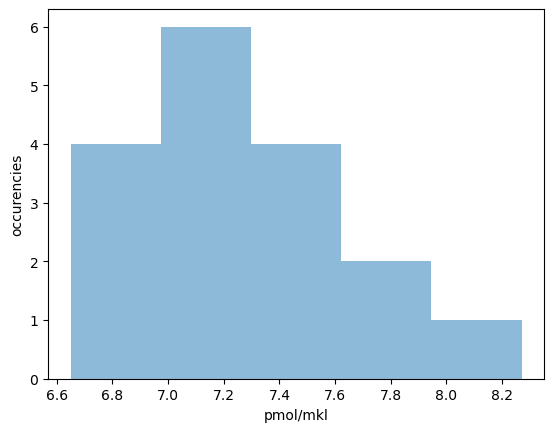

In [84]:
"""
смотрим распределение по корзинам
"""
ax = result['final conc, pmol/mkl'].plot.hist(bins=5, alpha=0.5)
ax.set_xlabel("pmol/mkl")
ax.set_ylabel("occurencies")

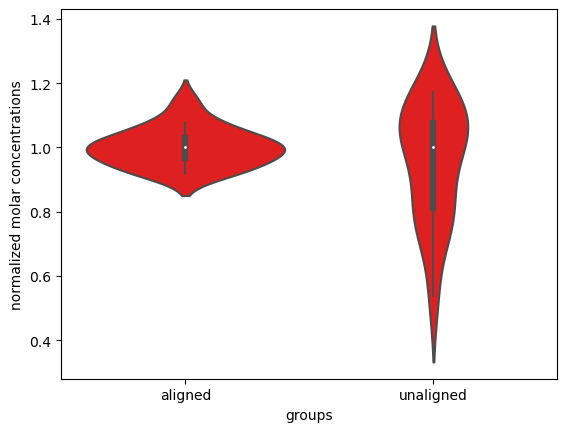

In [85]:
comparison_df = pd.DataFrame([initial_oligos_concentrations, result['final conc, pmol/mkl']]).T
comparison_df["unaligned"] = comparison_df["pM/mkl"]/comparison_df["pM/mkl"].median()
comparison_df["aligned"] = comparison_df['final conc, pmol/mkl']/comparison_df['final conc, pmol/mkl'].median()
comparison_df = comparison_df[["aligned", "unaligned"]]
comparison_df = comparison_df.melt(var_name='groups', value_name='normalized molar concentrations')

import seaborn as sns

ax = sns.violinplot(x = "groups", y="normalized molar concentrations", data=comparison_df, color='r', alpha = 0.1)


Сравниваем 4 эксперимента 
 - с выравниванием и без + эти два с очисткой на магнитных частицах
 - Как сравнивать? 
     - смотреть распределение продуктов на капиллярном форезе
     - по интенсивности на форезе при одинаковом количестве циклов 
     - на риалтаймнике
 - Можно ли одновременно на риалтаймнике?
